In [103]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import os

In [51]:
files = []
for f in [f for f in os.listdir('.') if f.startswith('zdbatch_') and f.endswith('.csv')]:
    tmp = pd.read_csv(f)
    tmp['actions'] = int(f.split('.')[0].split('_')[1])
    files.append(tmp)

df = pd.concat(files)

In [52]:
df['level'] = df.name.map(lambda x: int(x.split('_')[1]))
df['dict_size'] = df.name.map(lambda x: int(x.split('_')[2]))

# First, lets first display the impact of compression levels

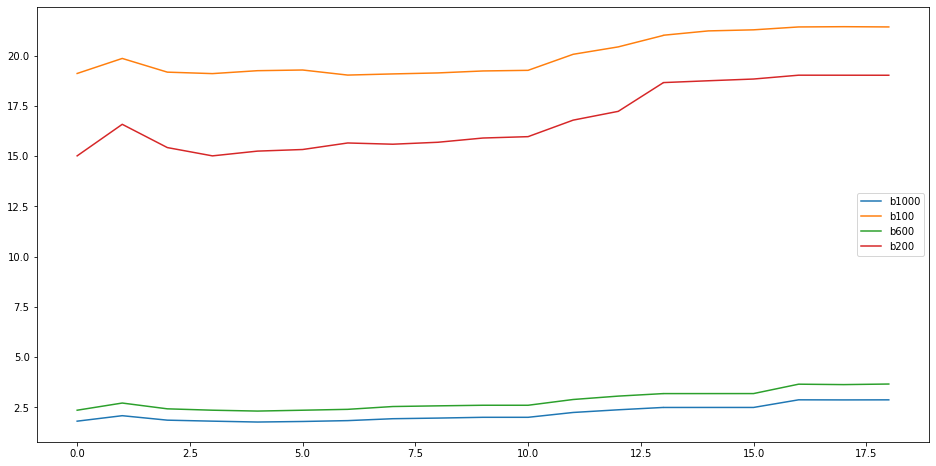

In [53]:
level = df[df.dict_size == 240000]
level = level.sort_values('name')

plt.figure(figsize=(16,8))

for actions in list(level.actions.unique()):
    b = level[level.actions == actions].sort_values('level')
    plt.plot(b.level, b.mean_ratio, label=f'b{actions}')
plt.legend()

# Now let's vizualize the impact of dictionary size

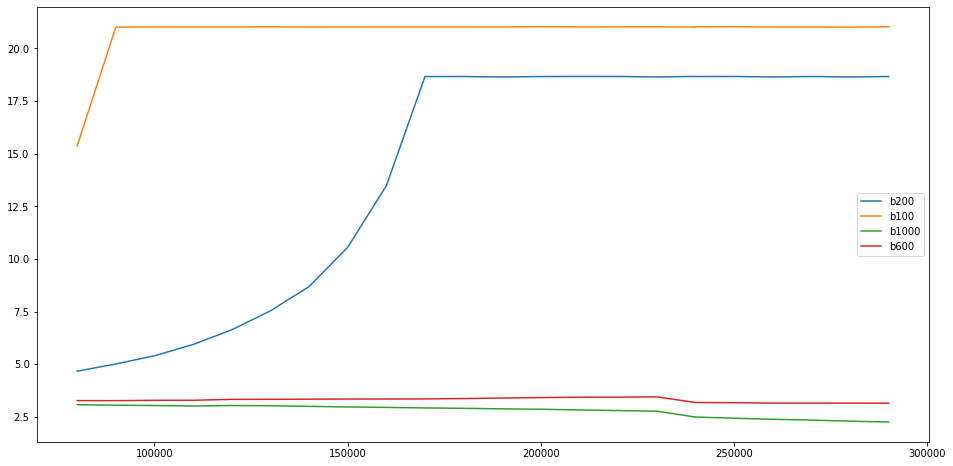

In [54]:
dsize = df[df.level == 13]
dsize = dsize.sort_values('name')

plt.figure(figsize=(16,8))

for actions in list(dsize.actions.unique()):
    b = dsize[dsize.actions == actions].sort_values('dict_size')
    plt.plot(b.dict_size, b.mean_ratio, label=f'b{actions}')
plt.legend()

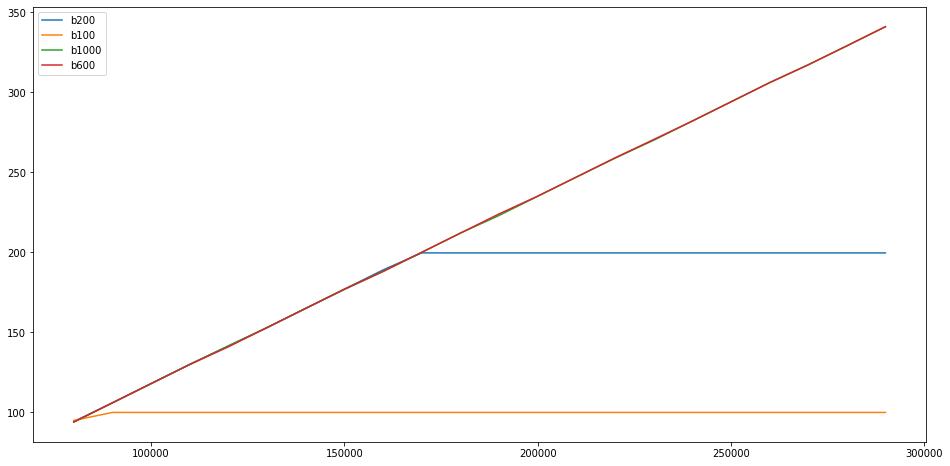

In [58]:
plt.figure(figsize=(16,8))

for actions in list(dsize.actions.unique()):
    b = dsize[dsize.actions == actions].sort_values('dict_size')
    plt.plot(b.dict_size, b['mean-dict-lines'], label=f'b{actions}')
plt.legend()

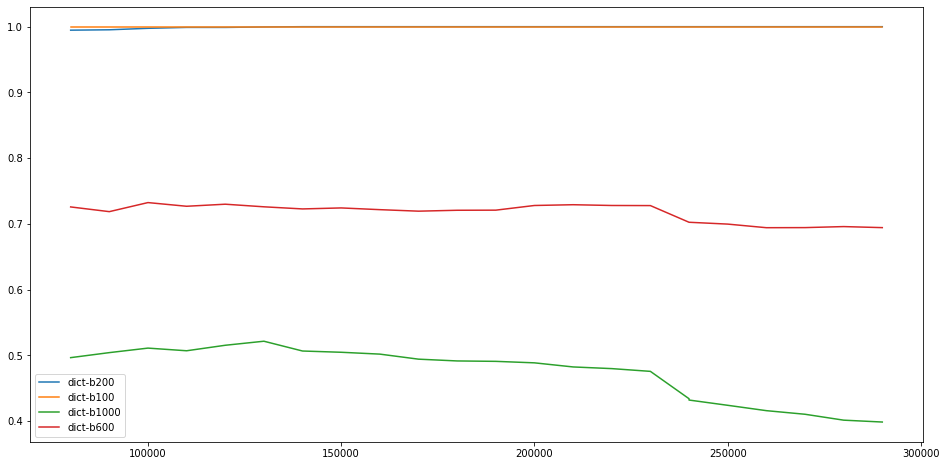

In [68]:
plt.figure(figsize=(16,8))
for actions in list(dsize.actions.unique()):
    b = dsize[dsize.actions == actions].sort_values('dict_size')
    plt.plot(b.dict_size, b['mean-dict-hit-ratio'], label=f'dict-b{actions}')
plt.legend()

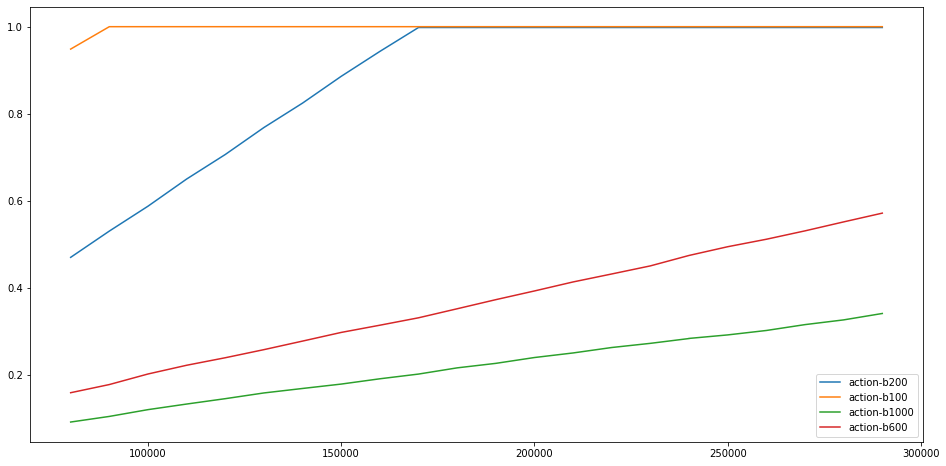

In [75]:
plt.figure(figsize=(16,8))
for actions in list(dsize.actions.unique()):
    b = dsize[dsize.actions == actions].sort_values('dict_size')
    plt.plot(b.dict_size, b['mean-action-hit-ratio'], label=f'action-b{actions}')
plt.legend()

In [80]:
def load_files_with_prefix(prefix):
    files = []
    for f in [f for f in os.listdir('.') if f.startswith(prefix) and f.endswith('.csv')]:
        tmp = pd.read_csv(f)
        tmp['actions'] = int(f.split('.')[0].split('_')[1])
        files.append(tmp)

    res = pd.concat(files)
    res['level'] = res.name.map(lambda x: int(x.split('_')[1]))
    res['dict_size'] = res.name.map(lambda x: int(x.split('_')[2]))
    return res

df2 = load_files_with_prefix('zd2batch_')

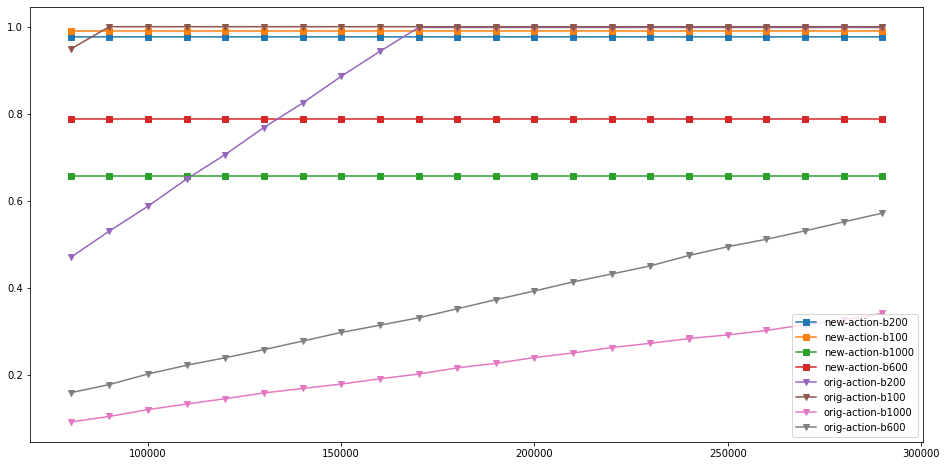

In [81]:

dsize2 = df2[df2.level == 13]
dsize2 = dsize2.sort_values('name')

plt.figure(figsize=(16,8))
for actions in list(dsize.actions.unique()):
    b = dsize2[dsize2.actions == actions].sort_values('dict_size')
    plt.plot(b.dict_size, b['mean-action-hit-ratio'], marker='s', label=f'new-action-b{actions}')

for actions in list(dsize.actions.unique()):
    b = dsize[dsize.actions == actions].sort_values('dict_size')
    plt.plot(b.dict_size, b['mean-action-hit-ratio'], marker='v', label=f'orig-action-b{actions}')

plt.legend()

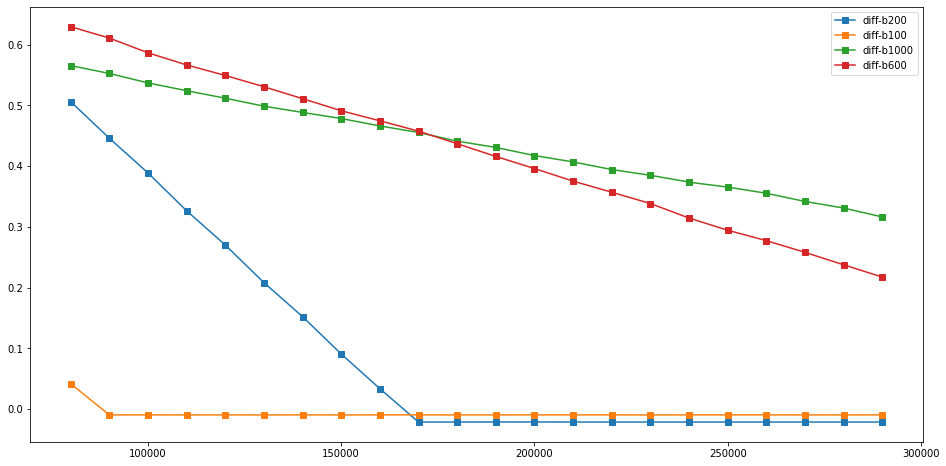

In [82]:
plt.figure(figsize=(16,8))
for actions in list(dsize.actions.unique()):
    nb = dsize2[dsize2.actions == actions].sort_values('dict_size')
    ob = dsize[dsize.actions == actions].sort_values('dict_size')
    
    diff = nb['mean-action-hit-ratio'] - ob['mean-action-hit-ratio']
    plt.plot(b.dict_size, diff, marker='s', label=f'diff-b{actions}')

plt.legend()

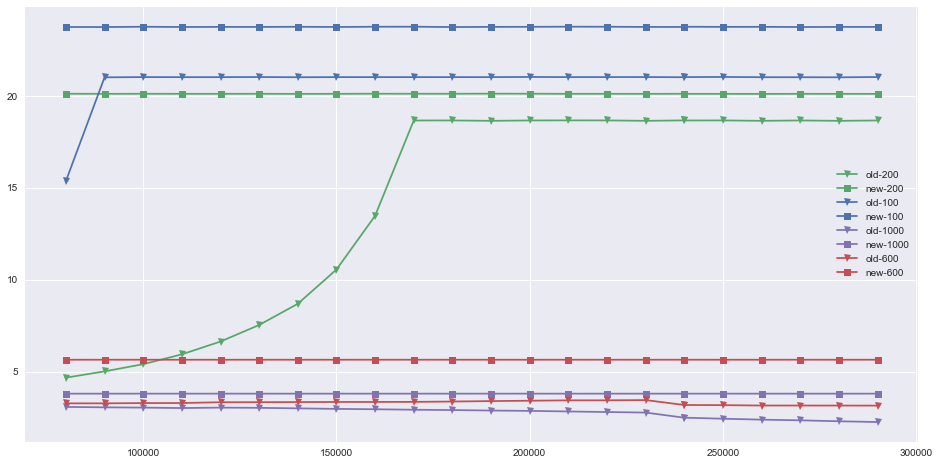

In [108]:
dsize2 = df2[df2.level == 13]
dsize2 = dsize2.sort_values('name')

# colors = 
plt.figure(figsize=(16,8))
mpl.style.use('seaborn')

colors = {
    100: 'C0',
    200: 'C1',
    600: 'C2',
    1000: 'C3'
}
for actions in list(dsize.actions.unique()):
    bold = dsize[dsize.actions == actions].sort_values('dict_size')
    bnew = dsize2[dsize2.actions == actions].sort_values('dict_size')
#     plt.plot(b.dict_size, bnew.mean_ratio / bold.mean_ratio, label=f'improvement-b{actions}')
    plt.plot(b.dict_size, bold.mean_ratio, marker='v', label=f'old-{actions}', color=colors[actions])
    plt.plot(b.dict_size, bnew.mean_ratio, marker='s', label=f'new-{actions}', color=colors[actions])

plt.legend()